### 목표
- 타이타닉데이를 학습해서 생존/사망자를 예측해보자!
- 머신러닝의 전체 과정을 이해하며 진행하자!
- kaggle 경진대회에서 높은 순위를 차지해보자!

##### 머신러닝 7과정
1. 문제정의(목표설정 / 생존자 예측)
2. 데이터 수집 (kaggle 에서 데이터 다운로드)
3. 데이터 전처리✨
4. 탐색적데이터분석 EDA (기술통계 확인, 변수간 상관관계 파악, 시각화
5. 모델 선택 및 하이퍼 파라미터 선택
6. 모델학습
7. 모델평가

##### 1. 문제정의
- 타이타닉 데이터를 학습해서 생존자와 사망자를 예측

##### 2. 데이터 수집
- kaggle 데이터 활용
- train, test 데이터 불러오기

In [1]:
# 도구불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 시각화라이브러리 (그래프가 다양, 색감 화려)

In [2]:
# train, test 데이터 불러오기
# 변수명 train, test 
# 인덱스를 'PassengerId' 컬럼으로 설정!
train = pd.read_csv('data/train.csv', index_col='PassengerId')
test = pd.read_csv('data/test.csv', index_col='PassengerId')

In [3]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


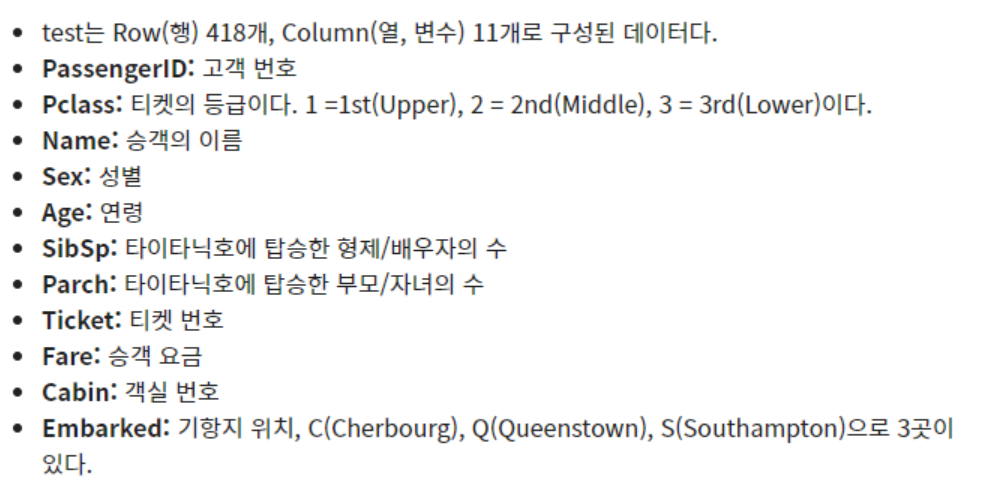

In [4]:
# 데이터 크기확인
print("훈련용데이터: " ,train.shape )
print("테스트용데이터: ", test.shape)

훈련용데이터:  (891, 11)
테스트용데이터:  (418, 10)


In [5]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


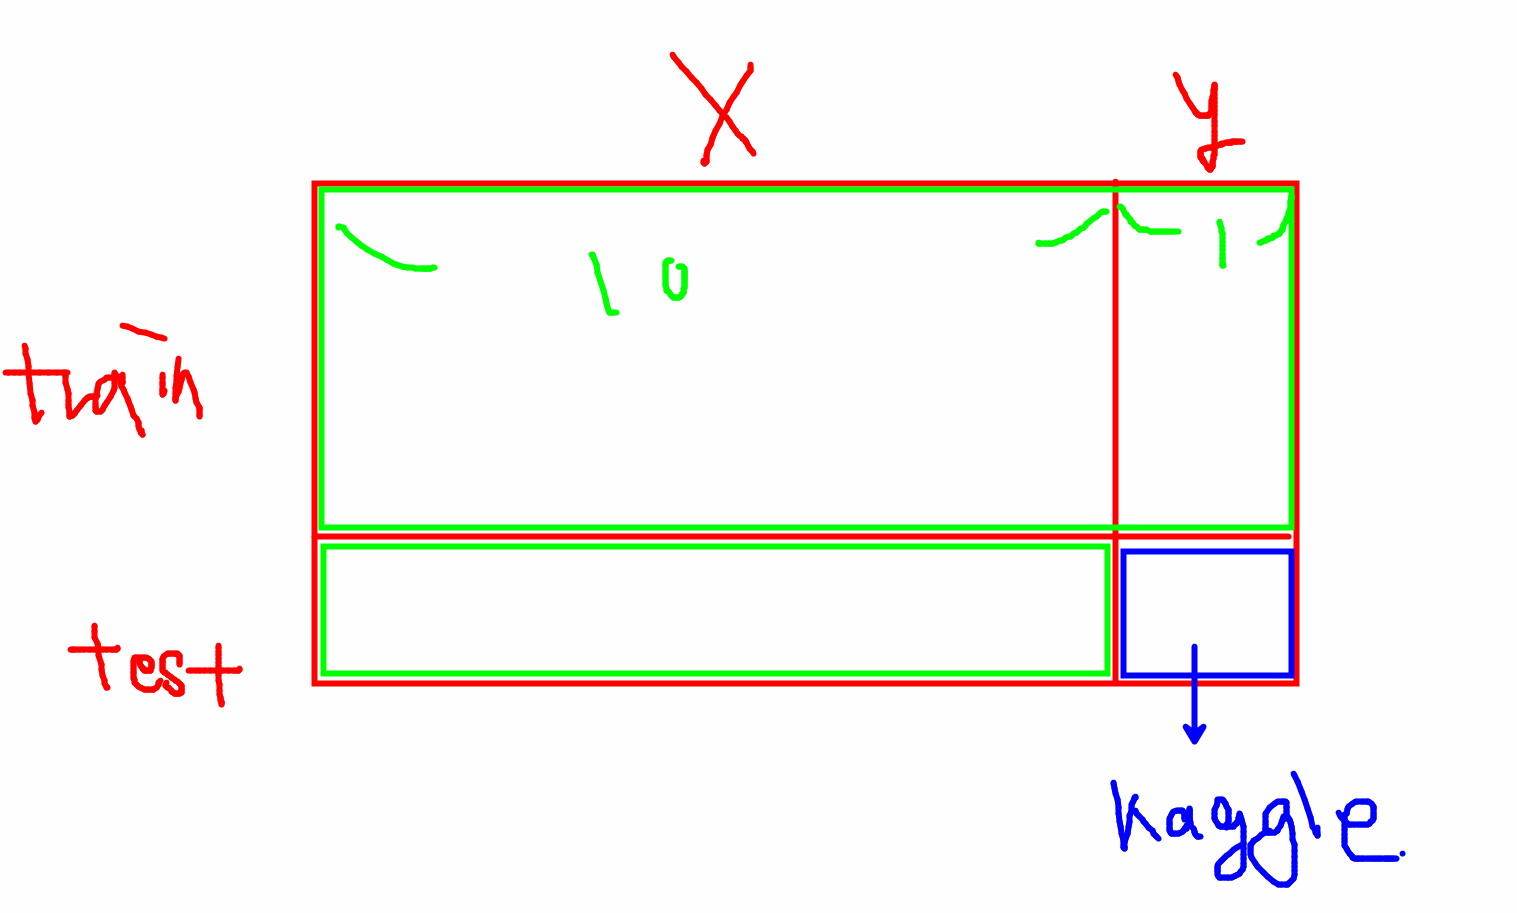

##### 3. 데이터 전처리
- 결측치, 이상치 제거

In [6]:
# 결측치, 이상치 확인
train.info()
test.info()
# 결측치 확인 -> 채워주기
# train : Age, Cabin, Embarked
# test: Age, Cabin, Fare

# 데이터 타입 확인 > 머신러닝 학습을 위해 숫자형태로 변환 (인코딩)

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    f

- 결측치를 단순 기술통계량으로 채우지 않고 컬럼간의 특성과 상관관계를 이용해서 결측치를 채워주자!

In [7]:
# 기술통계량 확인
train['Age'].describe()
# 714 개 데이터
# 평균 약 29세 최대 80
# 앞 쪽으로 치우쳐져있는 데이터 형태

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
# 문자열데이터 기술통계량 확인
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [9]:
# 조건을 줘서 위 B96 B98 에 Cabin 에 묵었던 인원 확인
# 데이터 추출 > 인덱싱, 슬라이싱 (인덱스) > 인덱스를 알아야함!
# 조건을 통해서 참인 값들만 추출 > 불리언인덱싱
# 데이터[조건]
train[train['Cabin'] == 'B96 B98']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [10]:
# 탑승구 확인
train['Embarked'].describe()
# 결측치 2개
# 가장 많이 탑승한 항구는 S 이구나~

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
# train 데이터에서 S항구에서 탑승한 인원은 추출
train[train['Embarked'] == 'S']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S


In [12]:
# test 데이터의 기술통계량 확인
# Age, Fare, Cabin
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [13]:
test['Fare'].describe()
# 중위수와 평균데이터의 차이가 있는편, 이상치 여부 확인

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [14]:
test['Cabin'].describe()
# 중복되지않은 유일한 값들이 많이 존재 
# 뚜렷한 특성을 보이지 않고있음

# 의미가 없으니까 컬럼을 제거할까?
# 삭제는 최후의 방법으로 사용

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

- 결측치 채우기

- Age 컬럼의 결측치를 채워보자!
    - 나이 > 평균
    - 분포 치우쳐져있는것을 확인 > 평균으로 채우게되면 신뢰성이 떨어지게된다
    - 다른 컬럼들과 상관관계를 이용해서 결측치를 상세하게 채워보자!

In [15]:
# 상관관계확인
train.corr(numeric_only=True)
# Age 데이터와 생존여부에 높은 상관관계를 가지는 Pclass 컬럼을 활용해보자!
# 관련있는 성별데이터도 함께 활용해서 Age 데이터 결측치를 채워보자!
# 기본지식, 상관관계, 기술통계량 등을 활용하여 결측치를 채우는것을 추천

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


##### 상관관계
- -1 ~ 1 사이의 숫자를 출력
- -1 에 가까울 수록 음의상관관계, 1에 가까울수록 양의 상관관계
- 0 관계없음.
- 숫자가 절대값 1에 가까울수록 관련이 높은 컬럼들이다!
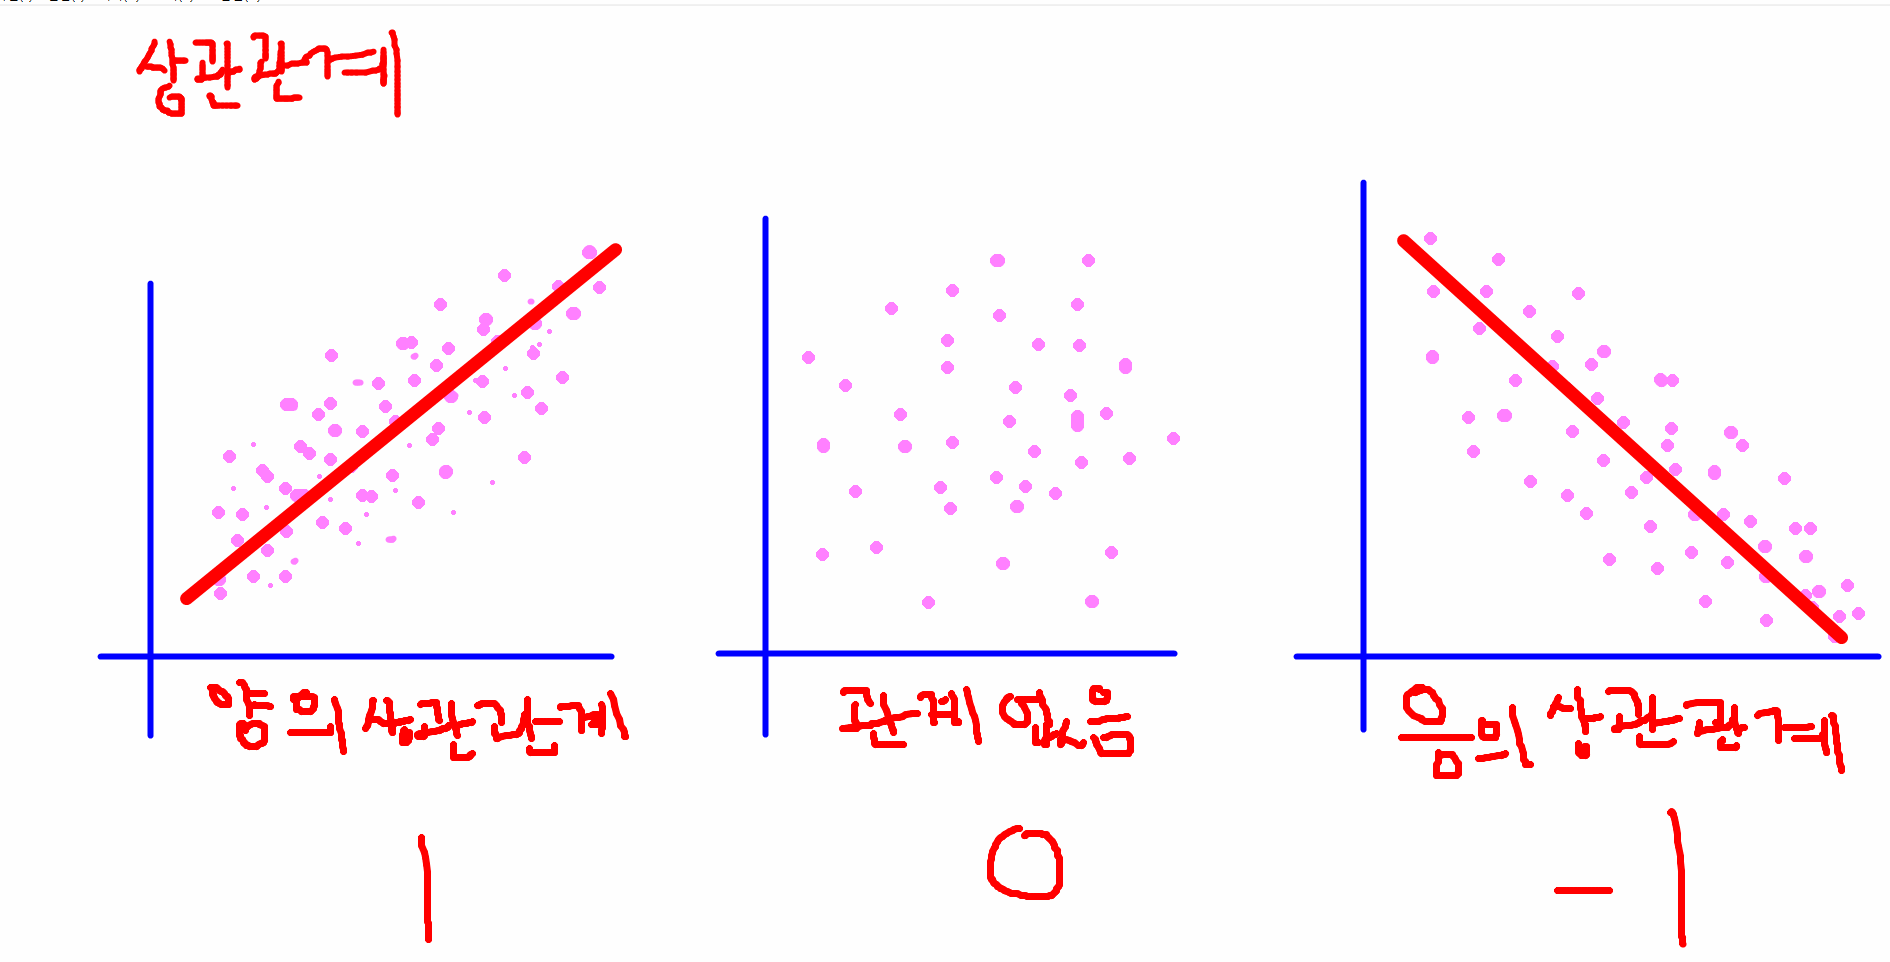

In [16]:
# 피봇테이블: 컬럼들의 요약된 정보를 출력할수 있게해주는 표
pt1 = train.pivot_table(values = 'Age', # 데이터로 사용할 컬럼
                 index = ['Pclass','Sex'], # 데이터 요약시 사용할 컬럼
                 aggfunc='mean')
pt1
# 각 클래스별, 성별로 나이 평균을 출력
# 결측치를 채울때 단순평균으로 채우는 것 보다는 관련있는 값으로 세분화해서 채워주기 위함

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [17]:
# 다중인덱싱/ 멀티인덱싱 -> 두개 이상의 인덱스가 존재할때 인덱싱 하는 방법
# df.loc[(앞인덱스, 뒤인덱스),컬럼]
# 1등급 여성 나이데이터 출력
pt1.loc[(1,'female'), 'Age']

34.61176470588235

In [18]:
# 3등급 남성 나이데이터 출력
pt1.loc[(3,'male'),'Age']

26.507588932806325

In [19]:
# 2등급 여성 나이데이터 출력
pt1.loc[(2,'female'),'Age']

28.722972972972972

In [20]:
# age 결측치를 처리하는 함수 정의
def fill_age (data):
    # 만약 Age 컬럼에 결측치가 있다면 피봇테이블에서 값을 찾아서 출력해줘
    if pd.isna(data['Age']):
        return pt1.loc[(data['Pclass'],data['Sex']),'Age']
    # 그렇지 않으면 (값이 있음) 원래 값을 출력해줘
    else:
        return data['Age']

In [21]:
# 위 함수를 우리의 train 에 적용
# apply: DataFrame 에서 행 또는 열에 함수를 적용할떄 사용한다
# DataFrame명.apply(함수이름, 축설정)
train['Age'] = train.apply(fill_age,axis = 1).astype('int64')

In [22]:
train['Age']

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    21
890    26
891    32
Name: Age, Length: 891, dtype: int64

In [23]:
# test 데이터도 결측치를 채워주자! (Age)
test['Age'] = test.apply(fill_age,axis = 1).astype('int64')

In [24]:
test['Age']

PassengerId
892     34
893     47
894     62
895     27
896     22
        ..
1305    26
1306    39
1307    38
1308    26
1309    26
Name: Age, Length: 418, dtype: int64

In [25]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    i

- train 의 Embarked 채우기
    - 결측치 2개

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [27]:
# 데이터 확인해봤더니 가장 많이 승선한 항이 'S'항구
train['Embarked'].describe()
# 결측치 양에 비해 뚜렷한 데이터가 존재하므로
# 'S' 데이터로 채우주기!
# 데이터가 많으면 많을수록 한두개의 데이터는 영향을 크게 미치지 않기때문

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [28]:
# 다른 항구의 개수도 확인
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
# 결측치를 'S'로 채워주기
# fillna(지정값) : 지정값으로 결측치를 채워주는 함수
train['Embarked'] = train['Embarked'].fillna('S')

In [30]:
# 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- test 의 Fare 컬럼 결측치 채우기~
    - 1개의 결측치

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [32]:
test['Fare'].describe()
# 평균: 35 최대값: 512 앞쪽에 데이터가 몰려있는 형태
# 전체평균으로 채우기에는 신뢰성이 떨어진다!
# 상관관계 확인

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [33]:
# Fare 상관관계 확인
test.corr(numeric_only=True)

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.520540,0.001087,0.018721,-0.577147
Age,-0.520540,1.000000,-0.084936,-0.062898,0.348593
SibSp,0.001087,-0.084936,1.000000,0.306895,0.171539
Parch,0.018721,-0.062898,0.306895,1.000000,0.230046
Fare,-0.577147,0.348593,0.171539,0.230046,1.000000


In [34]:
# 요약표 > 피벗테이블을 활용하여 확인
# Pclass, Sex  데이터를 통해 Fare 평균값을 확인
pt2 = test.pivot_table(values='Fare',
                      index=['Pclass','Sex'],
                      aggfunc='mean')
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [35]:
# 비어있는 값이 1개이기 때문에 함수생성X
# test 에서 비어있는 값만 출력 채워주기
# 조건: test 데이터에서 'Fare' 결측치인 사람(불리언인덱싱)
# isnull() 함수 사용하기~
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [36]:
# 3등급 남성의 요금 평균을 가져와서 채워주기! (11.826350)
test['Fare'] = test['Fare'].fillna(11.826350)

In [37]:
# 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


### Cabin 결측치 처리 (train, test 둘다 처리)
- Cabin 문자열
- Cabin 컬럼은 실제데이터보다 결측치가 더 많음 (컬럼자체를 삭제하는것도 한 방법)
- 시각화를 통해서 삭제여부를 확인

In [38]:
# 중복없이 값 출력
train['Cabin'].unique()
# 전체적으로 데이터 중복이 없음
# 모든값들이 알파벳을 가지고 있는것을 확인 > 알바펫 규칙
# 알파벳만 추출 (층)

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
# train, test 데이터 모두에 결측치에는 임의의 알파벳 'M' 채우고 
# 'Deck' 새로운 컬럼을 생성해주기
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')

In [40]:
train['Deck']

PassengerId
1         M
2       C85
3         M
4      C123
5         M
       ... 
887       M
888     B42
889       M
890    C148
891       M
Name: Deck, Length: 891, dtype: object

In [41]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,M
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,C85
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,M
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,C123
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,S,M
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,B42
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,NaN,S,M


In [42]:
# 'Deck'컬럼에서 알파벳만 출력
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [43]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis = 1, inplace=True)
test.drop('Cabin', axis = 1, inplace=True)

In [44]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    i

### 4. 탐색적 데이터 분석 (EDA)
- train, test 존재
- train 데이터를 이용하여 탐색
- test 로 탐색을 하는건 일반화에 도움이 되지 않음.

- Deck 시각화

In [45]:
# Deck 결측치가 많은 컬럼 > M 임의의 값으로 채워줌 > 컬럼 삭제 여부

# 피벗테이블 생성
pt4 = train.pivot_table(values='Name',
                 index = ['Deck','Survived'],
                 aggfunc='count')
pt4

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<Axes: xlabel='Deck', ylabel='count'>

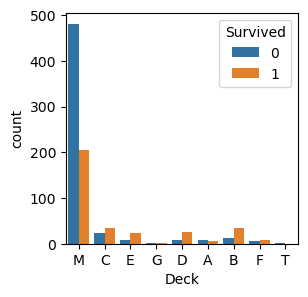

In [46]:
# M 데이터 사망자수가 월등히 많음!
# 시각화를 통해서 눈으로 확인
plt.figure(figsize=(3,3))
sns.countplot(data = train,
             x = 'Deck',
             hue = 'Survived')
# M 에 죽은사람의 비율이 높음
# 생존여부에 활용을 해보도로 하겠다!

<Axes: xlabel='Pclass', ylabel='count'>

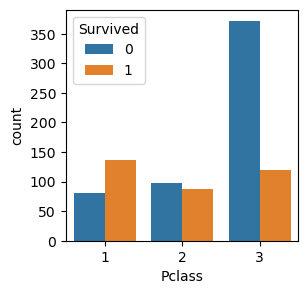

In [47]:
# Pclass 데이터 생존여부와의 관계
# countplot 을 그리고 해석해보기!
plt.figure(figsize=(3,3))

sns.countplot(data= train,
             x = 'Pclass',
             hue = 'Survived')
# 1등급 - 생존률이 높음
# 2등급 - 비교적 사망률이 높음
# 3등급 - 월등히 사망률이 높음
# 3등급의 사망률이 높은것을 확인 -> 가장 하층부에 위치하기 때문에 탈출이 힘들었음

<Axes: xlabel='Deck', ylabel='count'>

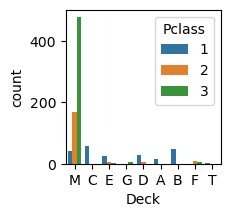

In [48]:
plt.figure(figsize=(2,2)) # 가로,세로
sns.countplot(data = train,
             x = 'Deck',
             hue = 'Pclass')

<Axes: xlabel='Sex', ylabel='count'>

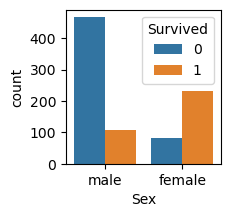

In [49]:
# 확인해보고싶은 컬럼 countplot 그려보기!
# Sex, Survived 관계
plt.figure(figsize=(2,2)) # 가로,세로
sns.countplot(data = train, x = 'Sex', hue = 'Survived')
# 여자의 생존률이 높은것을 확인

<Axes: xlabel='Age', ylabel='count'>

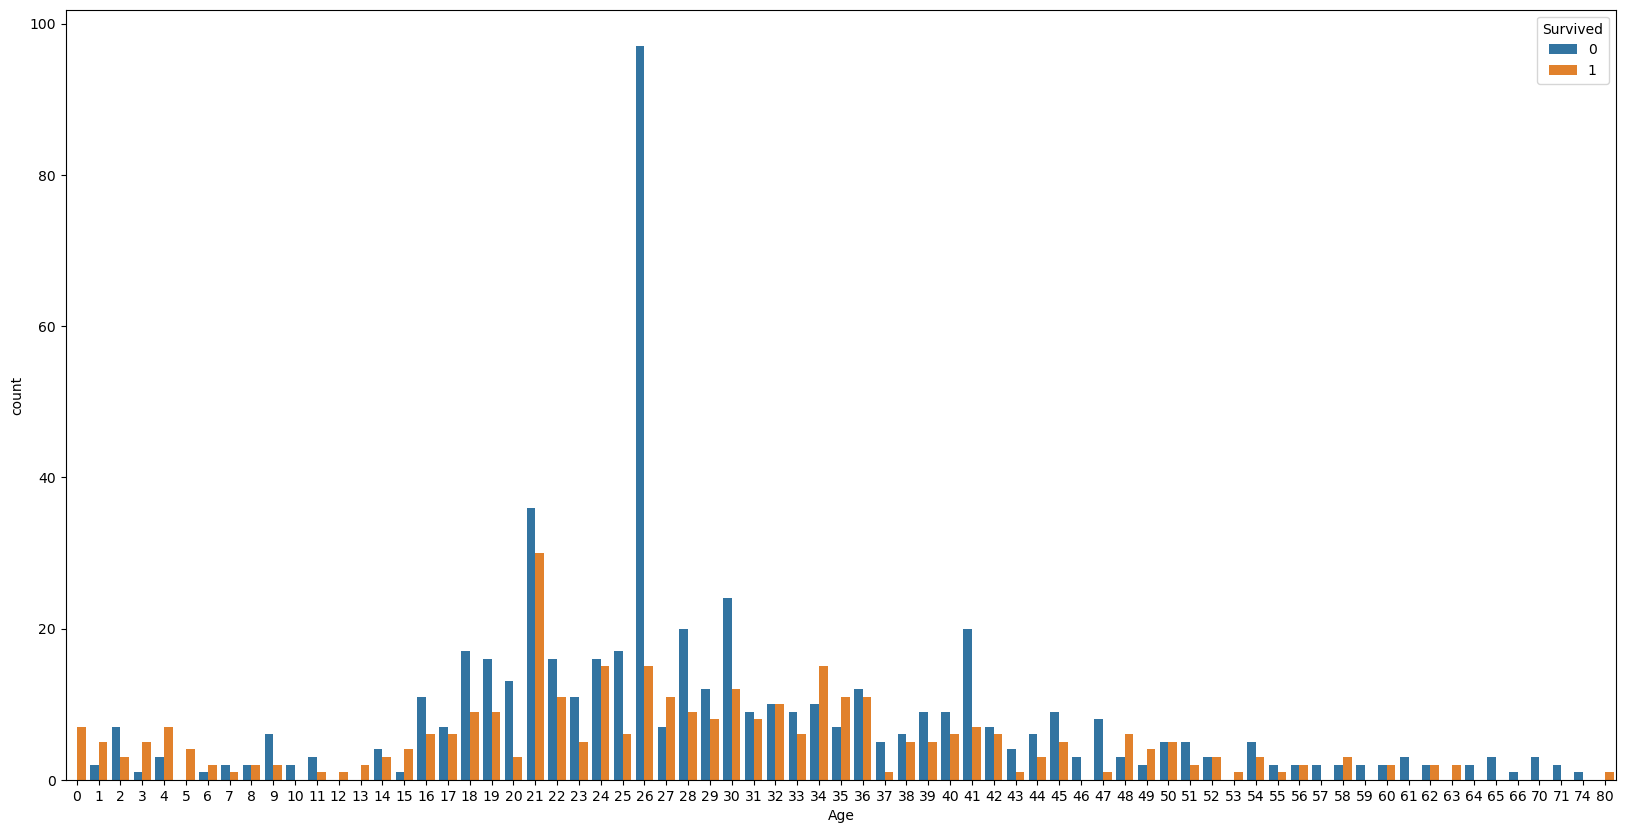

In [50]:
# Age 데이터 확인
plt.figure(figsize=(20,10)) # 가로,세로
sns.countplot(data = train, x='Age', hue = 'Survived')

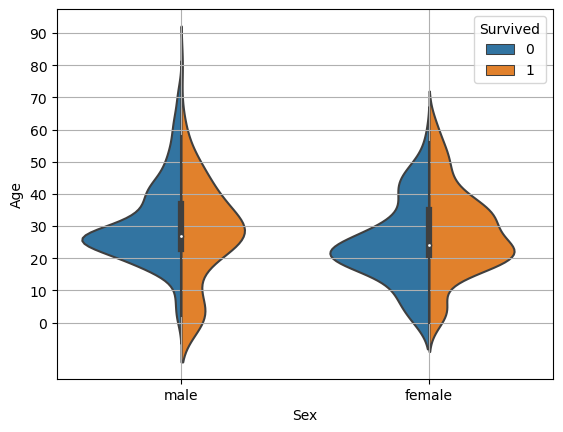

In [51]:
# 수치데이터의 분포를 파악할때 사용
# 바이올린플롯
# 바이올린 형태로 데이터의 분포와 밀도를 곡선으로 표현 그래프
# 데이터가 많이 분포하는 부분은 두껍게, 적게 분포하는 부분은 얇게 표현
sns.violinplot(data = train, x= 'Sex', y = 'Age', hue = 'Survived',
              split=True)
plt.yticks(range(0,100,10))
plt.grid()

# 20대부터 40대까지 분포가 넓음 -> 탑승자가 많다
# 나이가 어린 사람들 중에서는 남자아이가 여자아이에 비해 생존률이 높음

(0.0, 300.0)

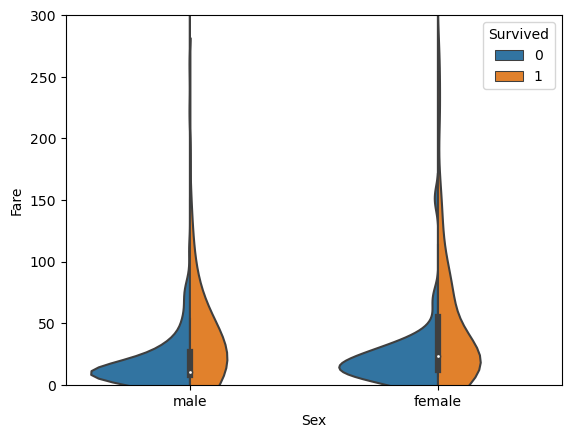

In [52]:
# x축 Sex, y축 Fare  에 따른 바이올린플롯 그려보기~
#plt.figure(figsize=(5,3)) # 가로,세로
sns.violinplot(data = train, x = 'Sex', y = 'Fare', hue = 'Survived', split=True)
plt.ylim(0,300)
# 상대적으로 요금이 낮은 사람들이 많이 사망했구나~

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


###### 특성공학: 새로운 컬럼 추출
- Parch : 함께 탑승한 부모자식의 수
- SibSp: 함께 탑승한 형제,자매, 배우자의 수
- 위 두개의 데이터를 확인했을때 결국은 비슷한 성격을 가진 데이터 (함께 탑승한 사람의 수)
- 부모자식, 형제자매,배우자 컬럼 합쳐서 > 가족의 수 새로운 컬럼 생성
- 주의! train, test 둘다 적용

In [54]:
# 두개의 컬럼을 더해서 가족의 수 'Family_Size' 새로운 컬럼 생성
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1 # 나 자신을 더해주기! (1인가구)
test['Family_Size'] = test['Parch'] + test['SibSp'] + 1 # 나 자신을 더해주기! (1인가구)

<Axes: xlabel='Family_Size', ylabel='count'>

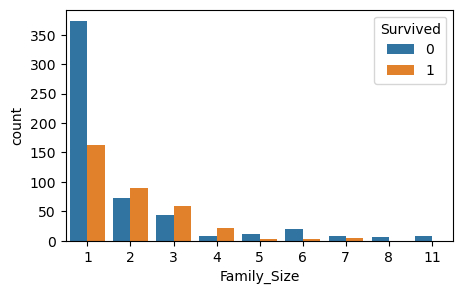

In [55]:
# Family_Size 데이터에 대해 시각화
plt.figure(figsize = (5,3))
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')
# 1명일때 죽은 비율이 높음
# 2~4 명 일떄 산 비율이 높음
# 5명 이상일떄 죽은 비율이 높음
# 범주의 크기를 줄여주면 사소한 관찰의 오류를 줄여준다!
# 같은 패턴을 가진 데이터들은 각자 학습시키지않고 묶어서 학습 시키는것이 효율적

In [56]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,M,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,M,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,C,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S,M,1
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S,B,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,S,M,4


In [59]:
# 카테고리화 함수 cut 활용하여 묶어주기!
# 가족의수 1 'Alone', 2~4 'Small', 5~ 'Large'
# train, test 둘다 적용
b = [0,1,4,11] # 구간설정 : 앞숫자 더하기 1 부터 뒤숫자까지 범위를 나눔
l = ['Alone','Small','Large'] # 각 구간별 이름 설정
train['Family_Size'] = pd.cut(train['Family_Size'], bins = b, labels = l)
test['Family_Size'] = pd.cut(test['Family_Size'], bins = b, labels = l)

TypeError: '<' not supported between instances of 'int' and 'str'

In [ ]:
train

In [ ]:
# 그룹화된 데이터 시각화
sns.countplot(data = train, x = 'Family_Size', hue = 'Survived')

In [ ]:
train.info()

In [63]:
train['Name']
# 유의미한 데이터를 찾아낼 수 있을까?
# 호칭?

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [64]:
# 일단 첫번째 한사람만 보고 확인
train['Name'][1].split(',')

['Braund', ' Mr. Owen Harris']

In [65]:
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [66]:
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [67]:
train['Name'][1].split(',')[1].split('.')[0].strip()
# 호칭추출완료!

'Mr'

In [68]:
# 모든 관측치에 적용하기 위해서 함수화
def split_name (data):
    return data.split(',')[1].split('.')[0].strip()

In [69]:
# apply 함수를 사용하여 train,test 데이터에 적용
# 'Title' (호칭)이라는 새로운 컬럼 생성해서 대입
# 데이터.apply(함수이름)
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

# 2차원 DataFrame 에서 한개의 컬럼만을 출력 > Series 형태의 데이터 > 1차원
# 축설정해줄 필요가 없음

In [70]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

(0.0, 10.0)

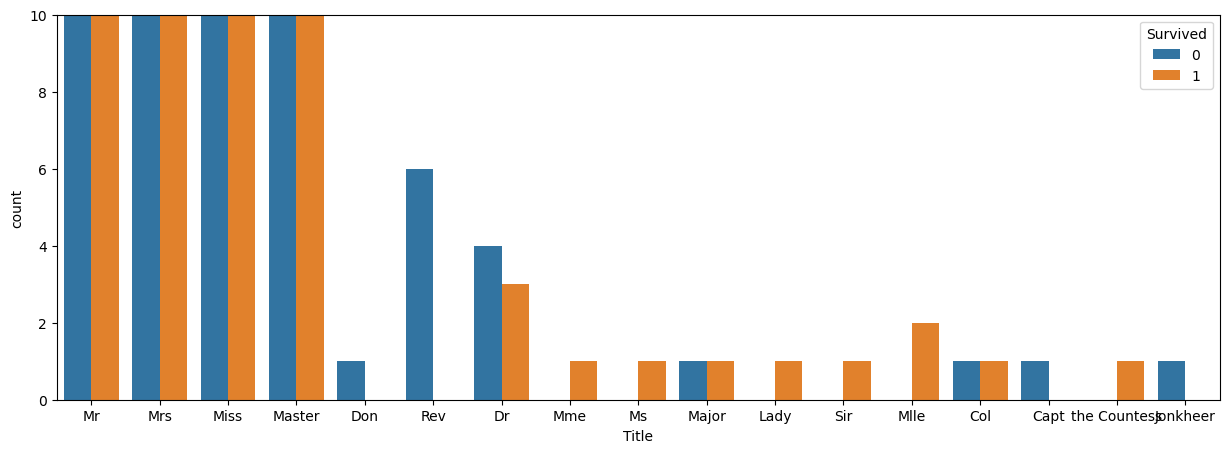

In [71]:
plt.figure(figsize = (15,5))
sns.countplot(data = train, x = 'Title', hue = 'Survived')
# 데이터가 작으면 잘 안보임 > 확대
plt.ylim(0,10)

- 개수가 많은 특징이 있는 데이터를 제외하고는 other 라고하는 그룹으로 묶어주기

In [72]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [73]:
title = ['Mr', 'Mrs', 'Miss', 'Master','Rev','Don','Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer']
len(title)

17

In [74]:
# 중요한 앞의 5개 데이터를 제외하고 나머지는 Other 호칭으로 변환
convert_title = ['Mr', 'Mrs', 'Miss', 'Master','Rev'] + ['Other']*12
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [75]:
# zip() : 리스트형태의 2개 데이터를 맵핑
# 딕셔너리 형태로 연결 (키,밸류)
title_dict = dict(zip(title,convert_title))
title_dict

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other'}

In [76]:
# map(): key 값에 맞는 value 값으로 짝지어서 변경해주는 함수
train['Title'] = train['Title'].map(title_dict)

In [77]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [78]:
# 'Title'이 "Dona" 인 인원 확인
test[test['Title'] == 'Dona']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck,Family_Size,Title
PassengerId,,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9,C,C,Alone,Dona


In [79]:
# 'Dona' 호칭에 Other 를 맵핑해주기위해 추가
title_dict['Dona'] = 'Other'

In [80]:
# 맵핑
test['Title'] = test['Title'].map(title_dict)

In [81]:
# 확인
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [82]:
# 확인
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [83]:
# test 데이터에만 존재하는 호칭 'Dona' >  nan 값으로 변환
test['Name'][1306]

'Oliva y Ocana, Dona. Fermina'

###### 필요없는 컬럼 삭제
- Name, SibSp, Parch, Ticket

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         891 non-null    object  
 11  Family_Size  891 non-null    category
 12  Title        891 non-null    object  
dtypes: category(1), float64(1), int64(5), object(6)
memory usage: 123.8+ KB


In [85]:
train['Ticket']
# ticket 데이터 삭제

PassengerId
1             A/5 21171
2              PC 17599
3      STON/O2. 3101282
4                113803
5                373450
             ...       
887              211536
888              112053
889          W./C. 6607
890              111369
891              370376
Name: Ticket, Length: 891, dtype: object

In [86]:
train.drop(['Name','Ticket','SibSp','Parch'], axis = 1, inplace = True)
test.drop(['Name','Ticket','SibSp','Parch'], axis = 1, inplace = True)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    int64   
 4   Fare         891 non-null    float64 
 5   Embarked     891 non-null    object  
 6   Deck         891 non-null    object  
 7   Family_Size  891 non-null    category
 8   Title        891 non-null    object  
dtypes: category(1), float64(1), int64(3), object(4)
memory usage: 95.9+ KB


In [90]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


### 모델링 
- 데이터 분리 (문제 , 정답)
- 모델선택
- 모델학습
- 모델평가

In [95]:
# X_train(문제_Survived를 제외한 나머지)
# y_train(정답-> Survived)
# X_test 
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [97]:
# 크기확인
print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 8) (891,)
(418, 8)


In [98]:
X_train.info()
# 문자열 형태의 데이터를 수치형으로 변경

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       891 non-null    int64   
 1   Sex          891 non-null    object  
 2   Age          891 non-null    int64   
 3   Fare         891 non-null    float64 
 4   Embarked     891 non-null    object  
 5   Deck         891 non-null    object  
 6   Family_Size  891 non-null    category
 7   Title        891 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 89.0+ KB


In [100]:
# 원핫인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [101]:
# 크기확인
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 25)


In [104]:
# 인코딩 후 X_train, X_test  컬럼수가 같지 않음 
# 머신러닝학습을 위해서는 컬럼의 순서와 개수를 맞춰주어야한다!!!
# set(): 중복이 없는 요소들만 값으로 구성
set(X_train.columns)-set(X_test.columns)

{'Deck_T'}

In [105]:
# X_train에는 존재하지만 X_test 에는 존재하지 않는 'Deck_T'컬럼
# X_test 에 'Deck_T' 컬럼 추가
# 컬럼은 새로 생기지만 실제로는 데이터가 없으므로 전체를 0 으로 채워주기!
X_test['Deck_T'] = 0

In [106]:
# 크기확인
print(X_train.shape)
print(X_test.shape)

(891, 26)
(418, 26)


In [107]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_Size_Alone',
       'Family_Size_Small', 'Family_Size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [108]:
X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Size_Alone',
       'Family_Size_Small', 'Family_Size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev', 'Deck_T'],
      dtype='object')

In [109]:
# 기계학습을 위하여 X_train, X_test 의 컬럼 순서도 맞춰주자!
# X_train에 있는 Deck_T 값을 마지막으로 옮겨주자!
# 1. Deck_T 컬럼을 임시변수에 저장
temp = X_train['Deck_T']

In [110]:
#2. 원래있는 X_train의 'Deck_T'삭제
X_train.drop('Deck_T', axis = 1, inplace=True)

In [111]:
#3. X_train에 Deck_T 추가
X_train['Deck_T'] = temp

In [112]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_Size_Alone',
       'Family_Size_Small', 'Family_Size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev', 'Deck_T'],
      dtype='object')

In [113]:
# 확인
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Age                891 non-null    int64  
 2   Fare               891 non-null    float64
 3   Sex_female         891 non-null    bool   
 4   Sex_male           891 non-null    bool   
 5   Embarked_C         891 non-null    bool   
 6   Embarked_Q         891 non-null    bool   
 7   Embarked_S         891 non-null    bool   
 8   Deck_A             891 non-null    bool   
 9   Deck_B             891 non-null    bool   
 10  Deck_C             891 non-null    bool   
 11  Deck_D             891 non-null    bool   
 12  Deck_E             891 non-null    bool   
 13  Deck_F             891 non-null    bool   
 14  Deck_G             891 non-null    bool   
 15  Deck_M             891 non-null    bool   
 16  Family_Size_Alone  891 non-null

- 모델학습
    - KNN 모델
    - 의사결정나무 모델

In [114]:
from sklearn.neighbors import KNeighborsClassifier #knn분류모델
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 분류모델

# 교차검증
from sklearn.model_selection import cross_val_score # 일반화 확인

In [129]:
# knn 모델 학습_ 하이퍼파라미터 조절X
# 모델객체생성
knn_model = KNeighborsClassifier()
# 모델 학습
knn_model.fit(X_train,y_train)
# 교차검증 > 문제데이터 X_train.values
result_2 = cross_val_score(knn_model, X_train.values, y_train, cv = 5 )
# 결과 (knn_pre)  > X_test.values
knn_pre = knn_model.predict(X_test.values)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [130]:
result_2.mean()

0.7104764296026616

In [118]:
# kaggle 제출방법
# gender_submission.csv 파일 읽어오기 (답안지파일 > 임의의 정답)
result_sub = pd.read_csv('data/gender_submission.csv')
result_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [120]:
# Survived 컬럼에 우리가 예측한 정답 덮어 씌어주기
result_sub['Survived'] = knn_pre

In [121]:
# csv 파일로 저장하기
result_sub.to_csv('data/CYH_sub01.csv', index=False)

In [ ]:
# decision tree 모델 학습_ 하이퍼파라미터 조절 X
# 교차검증
# 결과 (tree_pre)

In [ ]:
# kaggle 제출방법 설명

##### 성능 개선 사항
- 데이터 양을 늘리기위해서 수집
- 전처리방식 수정
- 더 좋은 모델을 사용
- 하이퍼파라미터 조절
- 범위조정(sclae 조정)
    - 거리계산을 하는 knn 모델의 성능을 높이기 위해서 사용하는 방법
    - sklearn 에서 Scaler 를 제공해줌 사용법만 알아두기!

In [122]:
# 도구 불러오기
from sklearn.preprocessing import StandardScaler

In [123]:
# 객체생성
scaler = StandardScaler()

In [124]:
# 스케일러 학습
scaler.fit(X_train)

StandardScaler()

In [125]:
# 학습된 스케일러의 데이터값의 범위를 "변환"
# X_train, X_test
t_X_train = scaler.transform(X_train)
t_X_test = scaler.transform(X_test)

In [126]:
knn_model.fit(t_X_train,y_train)

KNeighborsClassifier()

In [128]:
# 교차검증
result = cross_val_score(knn_model,t_X_train,y_train,cv= 5)
result.mean()

0.809189630280585